In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [15]:
cirro = pd.read_csv('cirrhosis.csv')


In [16]:
cirro.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [27]:
cirro['Copper']= cirro['Copper'].fillna(cirro['Copper'].mean())
cirro['Alk_Phos']=cirro['Alk_Phos'].fillna(cirro['Alk_Phos'].mean())
cirro['SGOT']= cirro['SGOT'].fillna(cirro['SGOT'].mean())
cirro['Tryglicerides']= cirro['Tryglicerides'].fillna(cirro['Tryglicerides'].mean())
cirro['Cholesterol']= cirro['Cholesterol'].fillna(cirro['Cholesterol'].mean())
cirro['Platelets']= cirro['Platelets'].fillna(cirro['Platelets'].mean())
cirro['Prothrombin']= cirro['Prothrombin'].fillna(cirro['Prothrombin'].mean())
cirro['Stage']= cirro['Stage'].fillna(cirro['Stage'].median())


In [28]:
cirro.describe()


,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,312.000000,418.000000,418.000000,312.000000,312.000000,312.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,209.500000,1917.782297,0.674641,1.506410,18533.351675,0.105263,0.923077,0.487179,0.711538,1.057416,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.023923
std,120.810458,1104.672992,0.583036,0.500762,3815.845055,0.307260,0.266897,0.500639,0.453775,0.387521,4.407506,191.077413,0.424972,73.697982,1848.437803,48.965657,53.479887,97.020057,1.019547,0.875678
min,1.000000,41.000000,0.000000,1.000000,9598.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,105.250000,1092.750000,0.000000,1.000000,15644.500000,0.000000,1.000000,0.000000,0.000000,1.000000,0.800000,273.000000,3.242500,51.250000,1016.250000,91.000000,95.000000,190.000000,10.000000,2.000000
50%,209.500000,1730.000000,1.000000,2.000000,18628.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.400000,369.510563,3.530000,97.648387,1717.000000,122.556346,124.702128,253.000000,10.600000,3.000000
75%,313.750000,2613.500000,1.000000,2.000000,21272.500000,0.000000,1.000000,1.000000,1.000000,1.000000,3.400000,369.510563,3.770000,100.750000,1982.655769,135.750000,127.750000,315.500000,11.100000,4.000000
max,418.000000,4795.000000,2.000000,2.000000,28650.000000,1.000000,1.000000,1.000000,1.000000,2.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


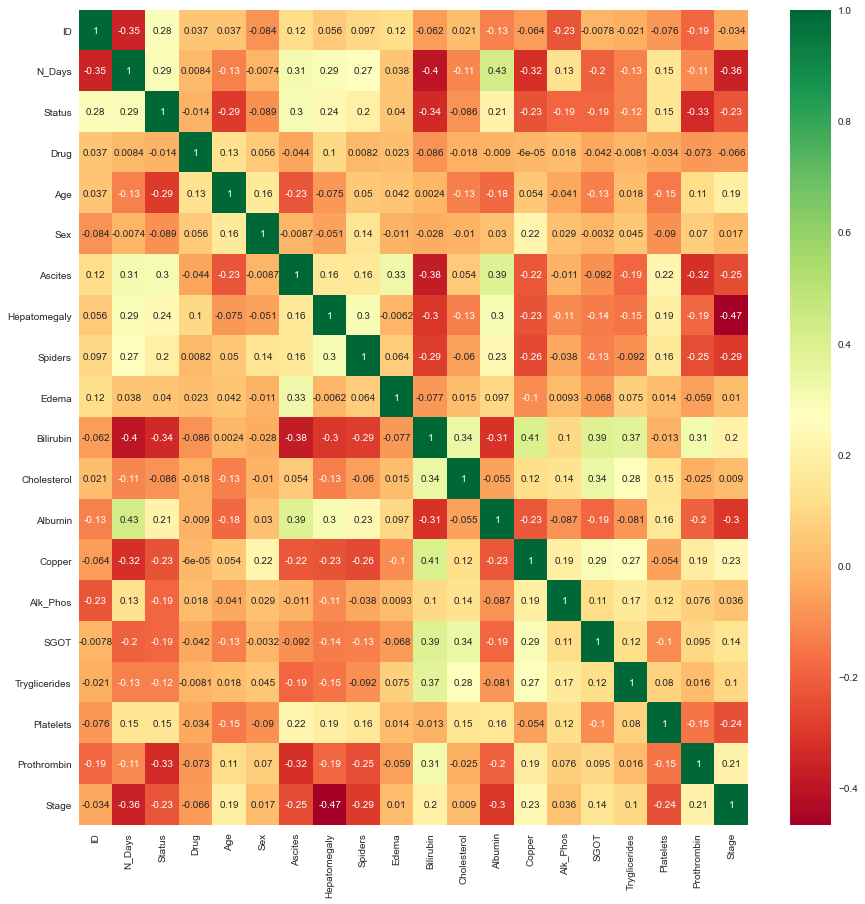

In [29]:
corrmat = cirro.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,15))
#plot heat map
g=sns.heatmap(cirro[top_corr_features].corr(),annot=True,cmap="RdYlGn")

array([[<AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'N_Days'}>,
        <AxesSubplot:title={'center':'Status'}>,
        <AxesSubplot:title={'center':'Drug'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Sex'}>,
        <AxesSubplot:title={'center':'Ascites'}>,
        <AxesSubplot:title={'center':'Hepatomegaly'}>],
       [<AxesSubplot:title={'center':'Spiders'}>,
        <AxesSubplot:title={'center':'Edema'}>,
        <AxesSubplot:title={'center':'Bilirubin'}>,
        <AxesSubplot:title={'center':'Cholesterol'}>],
       [<AxesSubplot:title={'center':'Albumin'}>,
        <AxesSubplot:title={'center':'Copper'}>,
        <AxesSubplot:title={'center':'Alk_Phos'}>,
        <AxesSubplot:title={'center':'SGOT'}>],
       [<AxesSubplot:title={'center':'Tryglicerides'}>,
        <AxesSubplot:title={'center':'Platelets'}>,
        <AxesSubplot:title={'center':'Prothrombin'}>,
        <AxesSubplot:title={'center':'Stage'}>

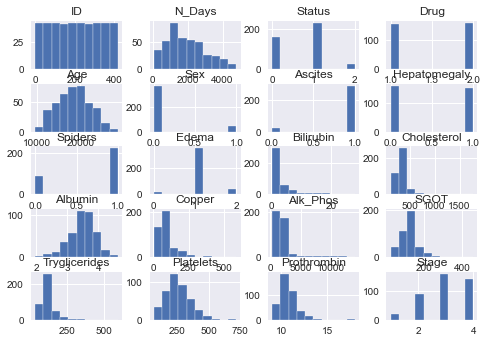

In [30]:
cirro.hist()


In [31]:
print ('Total Unhealthy  Livers First Stage : {} '.format(cirro.Stage.value_counts()[1]))
print ('Total UnHealthy Livers Second Stage : {} '.format(cirro.Stage.value_counts()[2]))
print ('Total Unhealthy Livers Third Stage : {} '.format(cirro.Stage.value_counts()[3]))
print ('Total Unhealthy Livers Fourth Stage : {} '.format(cirro.Stage.value_counts()[4]))

Total Unhealthy  Livers First Stage : 21 
Total UnHealthy Livers Second Stage : 92 
Total Unhealthy Livers Third Stage : 161 
Total Unhealthy Livers Fourth Stage : 144 


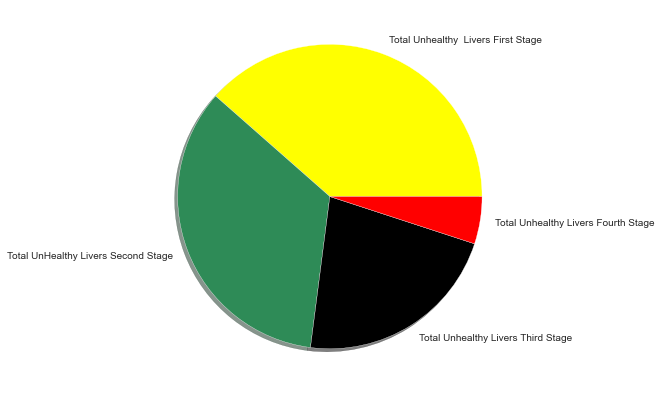

In [32]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(7,7))

plt.pie(x=cirro["Stage"].value_counts(), 
        colors=["yellow","seagreen","black","red"], 
        labels=["Total Unhealthy  Livers First Stage","Total UnHealthy Livers Second Stage","Total Unhealthy Livers Third Stage",
             "Total Unhealthy Livers Fourth Stage"  ], 
        shadow = True, 
       
        )

plt.show()

In [68]:
dataset = pd.get_dummies(cirro, columns = ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema'])


In [69]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['ID', 'N_Days', 'Age','Bilirubin','Cholesterol','Albumin','Copper','Alk_Phos','SGOT','Tryglicerides']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [70]:
dataset.head()


,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,...,Sex_1,Ascites_0.0,Ascites_1.0,Hepatomegaly_0.0,Hepatomegaly_1.0,Spiders_0.0,Spiders_1.0,Edema_0,Edema_1,Edema_2
0,-1.727912,-1.375612,0.768941,2.562152,-0.568568,-2.114296,0.792716,-0.143350,0.314753,0.885465,...,0,1,0,1,0,1,0,1,0,0
1,-1.719625,2.340341,0.546706,-0.481759,-0.353739,1.513818,-0.592970,2.931464,-0.184766,-0.687101,...,0,0,1,1,0,1,0,0,1,0
2,-1.711337,-0.820938,1.852567,-0.413611,-1.013947,-0.041088,1.526314,-0.794408,-0.540952,-1.304895,...,1,0,1,0,1,0,1,0,0,1
3,-1.703050,0.006542,0.383244,-0.322748,-0.657644,-2.255651,-0.457118,2.241950,-1.266205,-0.612217,...,0,0,1,1,0,1,0,0,0,1
4,-1.694763,-0.375023,-1.210972,0.040704,-0.474253,0.076708,0.616109,-0.710453,-0.192331,-0.986638,...,0,0,1,1,0,1,0,0,1,0


In [71]:
y = dataset['Stage']
X = dataset.drop(['Stage'], axis = 1)

In [72]:
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,y,cv=20)
    knn_scores.append(score.mean())

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

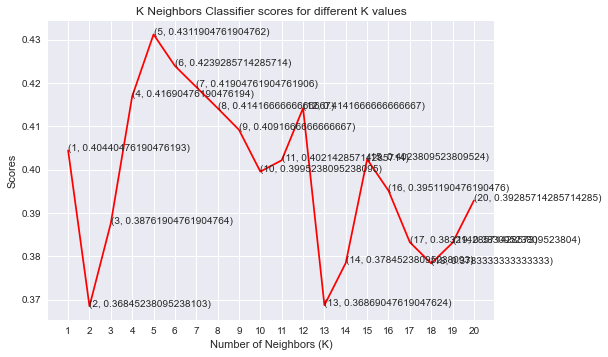

In [73]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [74]:
knn_classifier = KNeighborsClassifier(n_neighbors = 20)
score=cross_val_score(knn_classifier,X,y,cv=20)

In [75]:
score.mean()


0.39285714285714285

In [76]:
from sklearn.ensemble import RandomForestClassifier


In [77]:
randomforest_classifier= RandomForestClassifier(n_estimators=20)

score=cross_val_score(randomforest_classifier,X,y,cv=20)

In [78]:
score.mean()


0.48797619047619045